In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv('lung_cancer.csv')

In [ ]:
data.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER,Unnamed: 16
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES,NaN
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES,NaN
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO,NaN
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO,NaN
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO,NaN


In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
label_encoder = LabelEncoder()



In [ ]:
data['GENDER'] = label_encoder.fit_transform(data['GENDER'])


data['LUNG_CANCER'] = label_encoder.fit_transform(data['LUNG_CANCER'])

In [ ]:
data.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER,Unnamed: 16
0,1,69,1,2,2,1,1,2,1,2,2,2,2,2,2,1,NaN
1,1,74,2,1,1,1,2,2,2,1,1,1,2,2,2,1,NaN
2,0,59,1,1,1,2,1,2,1,2,1,2,2,1,2,0,NaN
3,1,63,2,2,2,1,1,1,1,1,2,1,1,2,2,0,NaN
4,0,63,1,2,1,1,1,1,1,2,1,2,2,1,1,0,NaN


In [ ]:
data.isnull().sum()

GENDER                     0
AGE                        0
SMOKING                    0
YELLOW_FINGERS             0
ANXIETY                    0
PEER_PRESSURE              0
CHRONIC DISEASE            0
FATIGUE                    0
ALLERGY                    0
WHEEZING                   0
ALCOHOL CONSUMING          0
COUGHING                   0
SHORTNESS OF BREATH        0
SWALLOWING DIFFICULTY      0
CHEST PAIN                 0
LUNG_CANCER                0
Unnamed: 16              309
dtype: int64

In [ ]:
selected_features = ['AGE', 'GENDER', 'SMOKING', 'YELLOW_FINGERS', 'ANXIETY', 'PEER_PRESSURE', 'CHRONIC DISEASE',
                     'COUGHING', 'SHORTNESS OF BREATH', 'SWALLOWING DIFFICULTY', 'CHEST PAIN']

In [ ]:
X = data[selected_features]
y = data['LUNG_CANCER']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [ ]:
y_pred = model.predict(X_test)


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)



[[ 1  1]
 [ 0 60]]


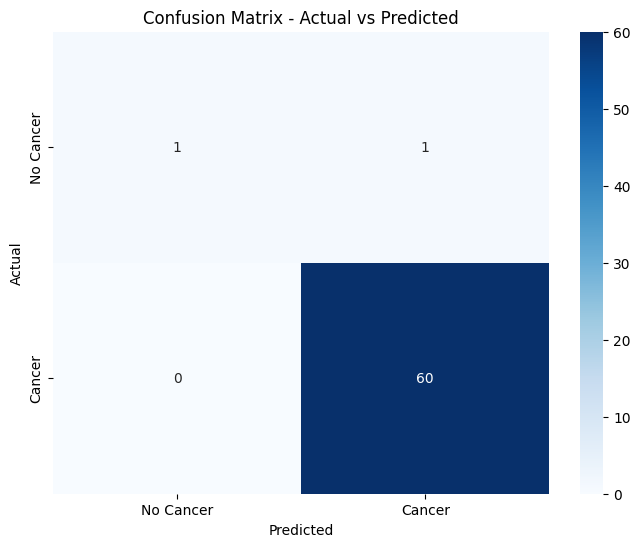

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', xticklabels=['No Cancer', 'Cancer'], yticklabels=['No Cancer', 'Cancer'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Actual vs Predicted')
plt.show()

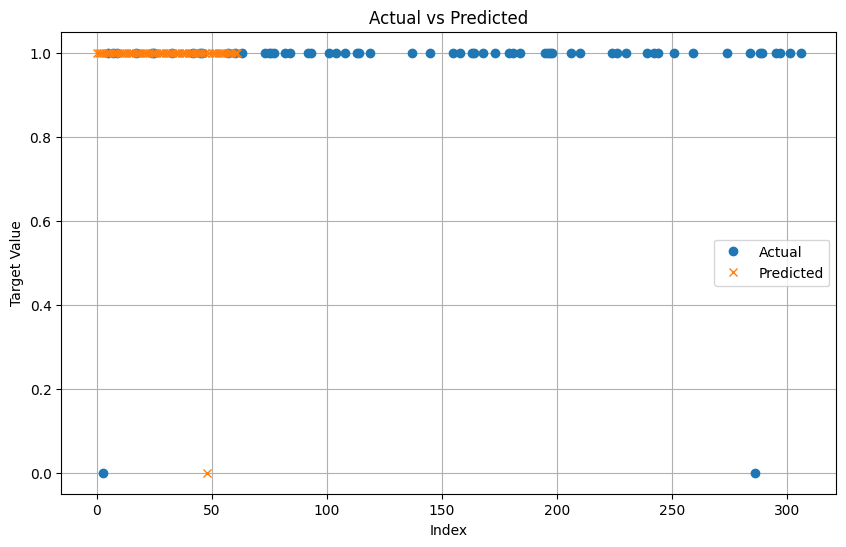

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

# Plotting actual values
plt.plot(y_test, label='Actual', marker='o', linestyle='None')

# Plotting predicted values
plt.plot(y_pred, label='Predicted', marker='x', linestyle='None')

plt.title('Actual vs Predicted')
plt.xlabel('Index')
plt.ylabel('Target Value')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score, precision_score

# Calculate accuracy score
accuracy = accuracy_score(y_test, y_pred)

# Calculate precision score
precision = precision_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)

Accuracy: 0.9838709677419355
Precision: 0.9836065573770492


In [ ]:
accuracy_logreg = accuracy_score(y_test, y_pred)
precision_logreg = precision_score(y_test, y_pred)
recall_logreg = recall_score(y_test, y_pred)
f1_logreg = f1_score(y_test, y_pred)
roc_auc_logreg = roc_auc_score(y_test, y_pred)

print(f"Logistic Regression - Accuracy: {accuracy_logreg:.2f}")
print(f"Logistic Regression - Precision: {precision_logreg:.2f}")
print(f"Logistic Regression - Recall: {recall_logreg:.2f}")
print(f"Logistic Regression - F1 Score: {f1_logreg:.2f}")
print(f"Logistic Regression - ROC AUC: {roc_auc_logreg:.2f}")

Logistic Regression - Accuracy: 0.98
Logistic Regression - Precision: 0.98
Logistic Regression - Recall: 1.00
Logistic Regression - F1 Score: 0.99
Logistic Regression - ROC AUC: 0.75


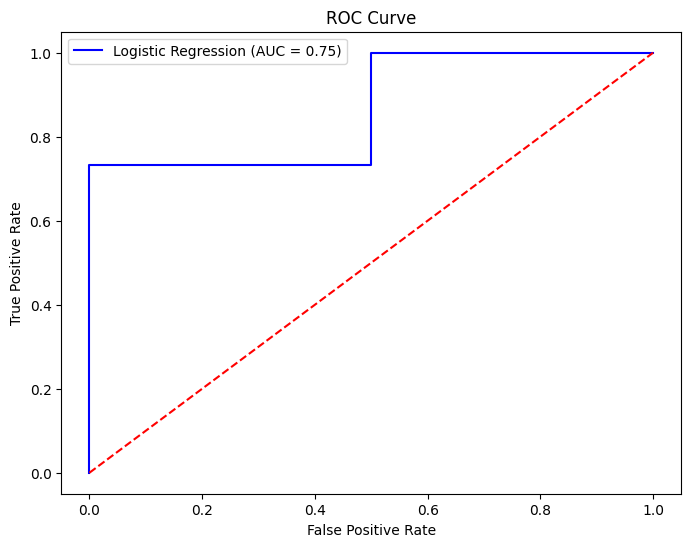

In [ ]:
# ROC Curve
fpr, tpr, _ = roc_curve(y_test, model.predict_proba(X_test)[:,1])
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'Logistic Regression (AUC = {roc_auc_logreg:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

In [ ]:

# Hyperparameter Tuning with Grid Search
param_grid = {
    'C': [0.1, 1, 10, 100],
    'solver': ['lbfgs', 'liblinear']
}
grid_search = GridSearchCV(LogisticRegression(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)
best_logreg_model = grid_search.best_estimator_

In [ ]:
y_pred_best_logreg = best_logreg_model.predict(X_test)
accuracy_best_logreg = accuracy_score(y_test, y_pred_best_logreg)
precision_best_logreg = precision_score(y_test, y_pred_best_logreg)
recall_best_logreg = recall_score(y_test, y_pred_best_logreg)
f1_best_logreg = f1_score(y_test, y_pred_best_logreg)
roc_auc_best_logreg = roc_auc_score(y_test, y_pred_best_logreg)

print(f"Best Logistic Regression - Accuracy: {accuracy_best_logreg:.2f}")
print(f"Best Logistic Regression - Precision: {precision_best_logreg:.2f}")
print(f"Best Logistic Regression - Recall: {recall_best_logreg:.2f}")
print(f"Best Logistic Regression - F1 Score: {f1_best_logreg:.2f}")
print(f"Best Logistic Regression - ROC AUC: {roc_auc_best_logreg:.2f}")

Best Logistic Regression - Accuracy: 0.97
Best Logistic Regression - Precision: 0.98
Best Logistic Regression - Recall: 0.98
Best Logistic Regression - F1 Score: 0.98
Best Logistic Regression - ROC AUC: 0.74


## **Using Neural Network**

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

In [ ]:
model = keras.Sequential([
    keras.layers.Dense(10000, input_shape=(11,), activation='sigmoid'),
    keras.layers.Dense(100, activation='sigmoid'),
    keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=500)

Epoch 1/500
8/8 [==============================] - 3s 17ms/step - loss: 0.9067 - accuracy: 0.7449
Epoch 2/500
8/8 [==============================] - 0s 19ms/step - loss: 0.8324 - accuracy: 0.8502
Epoch 3/500
8/8 [==============================] - 0s 21ms/step - loss: 0.7847 - accuracy: 0.8502
Epoch 4/500
8/8 [==============================] - 0s 20ms/step - loss: 0.7402 - accuracy: 0.8502
Epoch 5/500
8/8 [==============================] - 0s 20ms/step - loss: 0.6919 - accuracy: 0.8502
Epoch 6/500
8/8 [==============================] - 0s 19ms/step - loss: 0.6400 - accuracy: 0.8502
Epoch 7/500
8/8 [==============================] - 0s 18ms/step - loss: 0.5982 - accuracy: 0.8502
Epoch 8/500
8/8 [==============================] - 0s 19ms/step - loss: 0.5604 - accuracy: 0.8502
Epoch 9/500
8/8 [==============================] - 0s 23ms/step - loss: 0.5180 - accuracy: 0.8502
Epoch 10/500
8/8 [==============================] - 0s 19ms/step - loss: 0.4859 - accuracy: 0.8502
Epoch 11/500
8/8 [=

In [ ]:
model.evaluate(X_test,y_test)

2/2 [==============================] - 0s 16ms/step - loss: 0.2243 - accuracy: 0.9677


[0.22431382536888123, 0.9677419066429138]

2/2 [==============================] - 0s 9ms/step


In [ ]:
y_pred = y_pred.ravel()
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

ValueError: Found input variables with inconsistent numbers of samples: [62, 1]

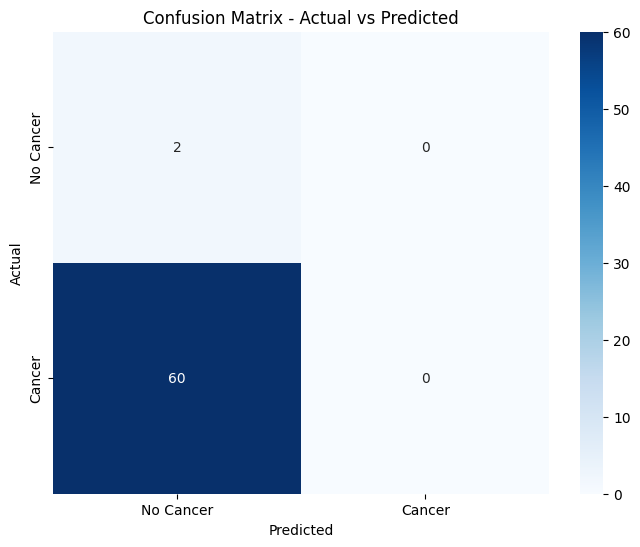

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', xticklabels=['No Cancer', 'Cancer'], yticklabels=['No Cancer', 'Cancer'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Actual vs Predicted')
plt.show()